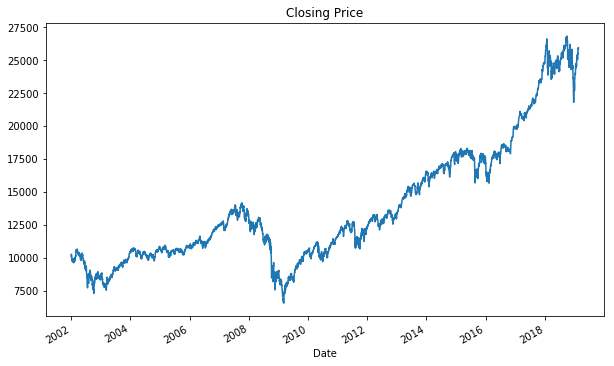

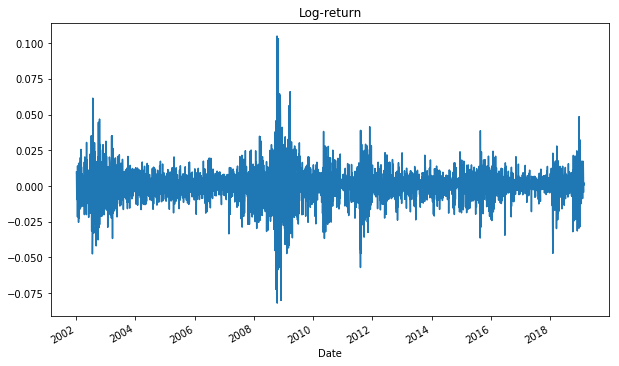

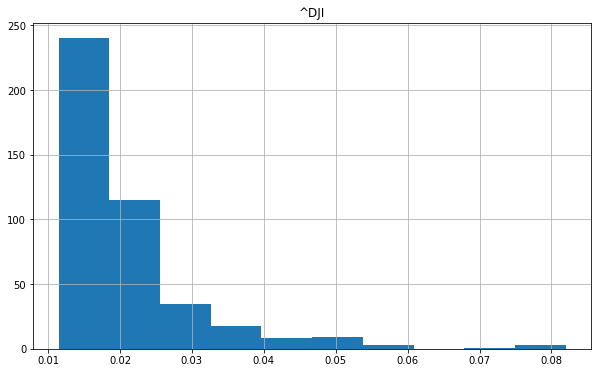

Calculating best minimal value for power law fit
C:\Users\dell\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit


Only the 10% lowest logreturns from the left tail are selected
Parameters of the Pareto Distribution
Estimated tail index alpha=3.884
Estimated x_min=0.019


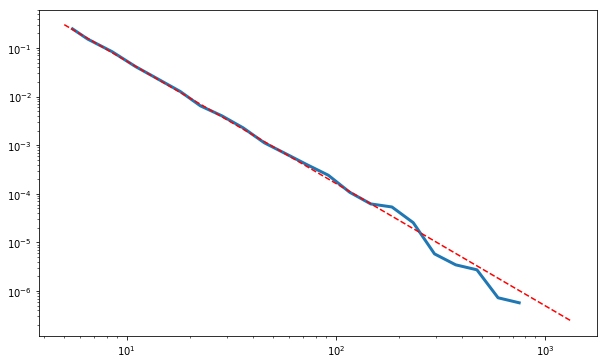

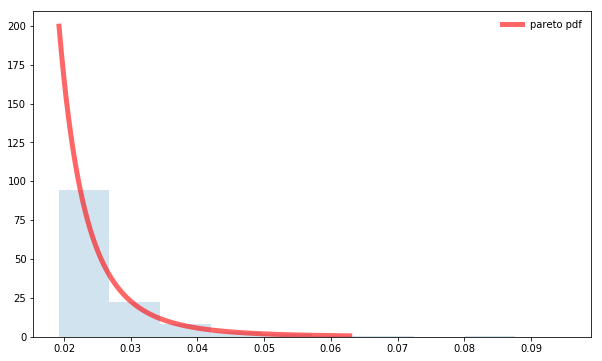

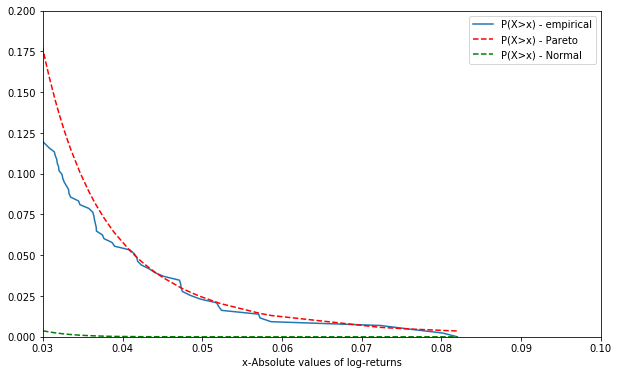

In [46]:
'''
This program models the left tail of the log-returns distribution using Pareto 
and Normal distribution.
'''
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto
from scipy.stats import norm
# We will look at stock prices overtime
start = datetime.datetime(2002,1,1)
end = datetime.date.today()

from pandas_datareader import data as wb  

ticker = '^DJI' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start=start, end=end)['Close']

data.plot(figsize=(10, 6), legend = False, title='Closing Price');

log_returns = np.log(1 + data.pct_change())
log_returns.plot(figsize=(10, 6),legend = False, title='Log-return');

import powerlaw
data.dropna()


q=log_returns.quantile(0.1)
mu=log_returns.mean(axis=0)
sigma=log_returns.std(axis=0)
#print(mu)
#print(sigma)
#print(q)


x=log_returns[log_returns<=q].dropna()
y=x.abs()
fig=y.hist(figsize=(10, 6))

plt.show(block=False)



y=np.array(y)


z=y.ravel()




#plt.clf()
#plt.cla()


fit = powerlaw.Fit(z)
alpha=fit.alpha
xmin=fit.xmin

print('Only the 10% lowest logreturns from the left tail are selected')
print('Parameters of the Pareto Distribution')
print('Estimated tail index alpha=%.3f' %alpha)
print('Estimated x_min=%.3f' %xmin)
simulated_data = fit.power_law.generate_random(100)

theoretical_distribution = powerlaw.Power_Law(xmin=5.0, parameters=[2.5])
simulated_data = theoretical_distribution.generate_random(10000)

theoretical_distribution = powerlaw.Power_Law(xmin=5.0, parameters=[2.5])
simulated_data = theoretical_distribution.generate_random(10000)
####

plt.figure(figsize=(10,6))

fit = powerlaw.Fit(simulated_data)
fit.power_law.xmin, fit.power_law.alpha

powerlaw.plot_pdf(simulated_data,linewidth=3)
fit.power_law.plot_pdf(simulated_data,linestyle='--',color='r')
loc=0
#xmin*alpha/(alpha-1)

r = pareto.rvs(alpha, size=1000, loc=loc, scale=xmin)
fig, ax = plt.subplots(1, 1)

x = np.linspace(pareto.ppf(0.01, alpha, loc=loc, scale=xmin),
                pareto.ppf(0.99, alpha, loc=loc, scale=xmin), 1000)
ax.plot(x, pareto.pdf(x, alpha, loc=loc, scale=xmin),
       'r-', lw=5, alpha=0.6, label='pareto pdf')

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()




xs = np.sort(z)
ys = 1-np.arange(1, len(xs)+1)/float(len(xs))
zs=1-pareto.cdf(xs, alpha, loc=0, scale=xmin)
vs=1-norm.cdf(xs, mu, sigma)

plt.plot(xs, ys)
plt.plot(xs, zs, linestyle='--',color='r')
plt.plot(xs, vs, linestyle='--',color='g')
legend(['P(X>x) - empirical', 'P(X>x) - Pareto', 'P(X>x) - Normal'])
axis([0.03, 0.1, 0, 0.2])
xlabel('x-Absolute values of log-returns')
plt.show()